In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
plt.style.use('default')
import seaborn as sns
sns.set_palette("ch:start=.2,rot=-.3", 13)

In [2]:
g = 1.0
D = 8

In [3]:
lambdaRange = 10.0 ** np.linspace(-6,0,num=13)
betaRange = [1.0, 2.0, 4.0, 6.0, 8.0, 10.0, 20.0, 30.0, 40.0]

In [4]:
# Data Folders
DataFolder = "/data/sliang/CMPO/ising/spectrum_nnls"

In [5]:
# load NNLS Data Files
SwDict = {}
for b in betaRange:
    for i in lambdaRange:
        key1 = "D_%i_beta_%i_lambda_%e" % (D, b, i)
        key2 = "D_%im2_beta_%i_lambda_%e" % (D, b, i)
        SwFile1 = "%s/Sw/g_%.1f_D_%i_beta_%i_lambda_%e.txt" % (DataFolder, g, D, b, i)
        SwFile2 = "%s/Sw/g_%.1f_D_%im2_beta_%i_lambda_%e.txt" % (DataFolder, g, D, b, i)
        SwDict[key1] = np.loadtxt(SwFile1)
        SwDict[key2] = np.loadtxt(SwFile2)
AwDict = {}
for b in betaRange:
    for i in lambdaRange:
        key1 = "D_%i_beta_%i_lambda_%e" % (D, b, i)
        key2 = "D_%im2_beta_%i_lambda_%e" % (D, b, i)
        AwFile1 = "%s/Sw/g_%.1f_D_%i_beta_%i_lambda_%e.txt" % (DataFolder, g, D, b, i)
        AwFile2 = "%s/Sw/g_%.1f_D_%im2_beta_%i_lambda_%e.txt" % (DataFolder, g, D, b, i)
        AwDict[key1] = np.loadtxt(SwFile1)
        AwDict[key2] = np.loadtxt(SwFile2)

In [6]:
# load Zi-Long Li Data Files
LiFolder = "/data/sliang/CMPO/ising/spectrum_Li"
LiSwDict={}
for b in betaRange:
    key = "beta_%i" % b
    LiSwFile = "%s/Sw/g_%.1f_beta_%i.txt" % (LiFolder, g, b)
    LiSwDict[key] = np.loadtxt(LiSwFile)

In [22]:
def plot_Sw(beta, dim, laRange = lambdaRange, m2 = False,  c = True):
    colors = plb.cm.Blues(np.linspace(0, 1, np.size(laRange) + 1))
    Dict = SwDict

    for i in range(np.size(laRange)):
        la = laRange[i]
        if m2 == False:
            k1 = "D_%i_beta_%i_lambda_%e" % (dim, beta, la)
            title = r"TFIsing g=%.1f, D=%i, $\beta$ = %.1f" %(g, D, beta)
        else:
            k1 = "D_%im2_beta_%i_lambda_%e" % (dim, beta, la)
            title = r"TFIsing g=%.1f, D=%i$\times$2, $\beta$ = %.1f" %(g, D, beta)
        if c == True:
            plt.plot(Dict[k1][:,0], Dict[k1][:,1], color = colors[-(i+1)], label=r"$\beta$=%.1f,$\lambda$ = %3e" %(beta,la))
        else:
            plt.plot(Dict[k1][:,0], Dict[k1][:,1], label=r"$\beta$=%.1f,$\lambda$ = %3e" %(beta,la))
    
    kl = "beta_%i" % beta
    plt.plot(LiSwDict[kl][:,0], LiSwDict[kl][:,1], 'k', label=r"$\beta$=%.1f, Li" % beta)
    plt.xlabel(r'$\omega$')
    plt.ylabel(r'%S($\omega$)')
    plt.xlim(0,5)

    plt.title(title)
    plt.legend()

def plot_Aw(beta, dim, laRange = lambdaRange, m2 = False, li = False):
    colors = plb.cm.Oranges(np.linspace(0, 1, np.size(laRange) + 1))
    Dict = AwDict

    for i in range(np.size(laRange)):
        la = laRange[i]
        if m2 == False:
            k1 = "D_%i_beta_%i_lambda_%e" % (dim, beta, la)
            title = r"TFIsing g=%.1f, D=%i, $\beta$ = %.1f" %(g, D, beta)
        else:
            k1 = "D_%im2_beta_%i_lambda_%e" % (dim, beta, la)
            title = r"TFIsing g=%.1f, D=%i$\times$2, $\beta$ = %.1f" %(g, D, beta)
        xdata =  Dict[k1][2:,0]
        ydata =  Dict[k1][2:,1]/(1.0 - np.exp(-beta * xdata))
        plt.plot(xdata, ydata, "--", color = colors[-(i+1)], label=r"$\beta$=%.1f,$\lambda$ = %3e" %(beta,la))
    
    if li == True:
        kl = "beta_%i" % beta
        plt.plot(LiSwDict[kl][:,0], LiSwDict[kl][:,1], 'k', label=r"$\beta$=%.1f, Li" % beta)
    plt.xlabel(r'$\omega$')
    plt.ylabel(r'%S($\omega$)')
    plt.xlim(0,5)

    plt.title(title)
    plt.legend()


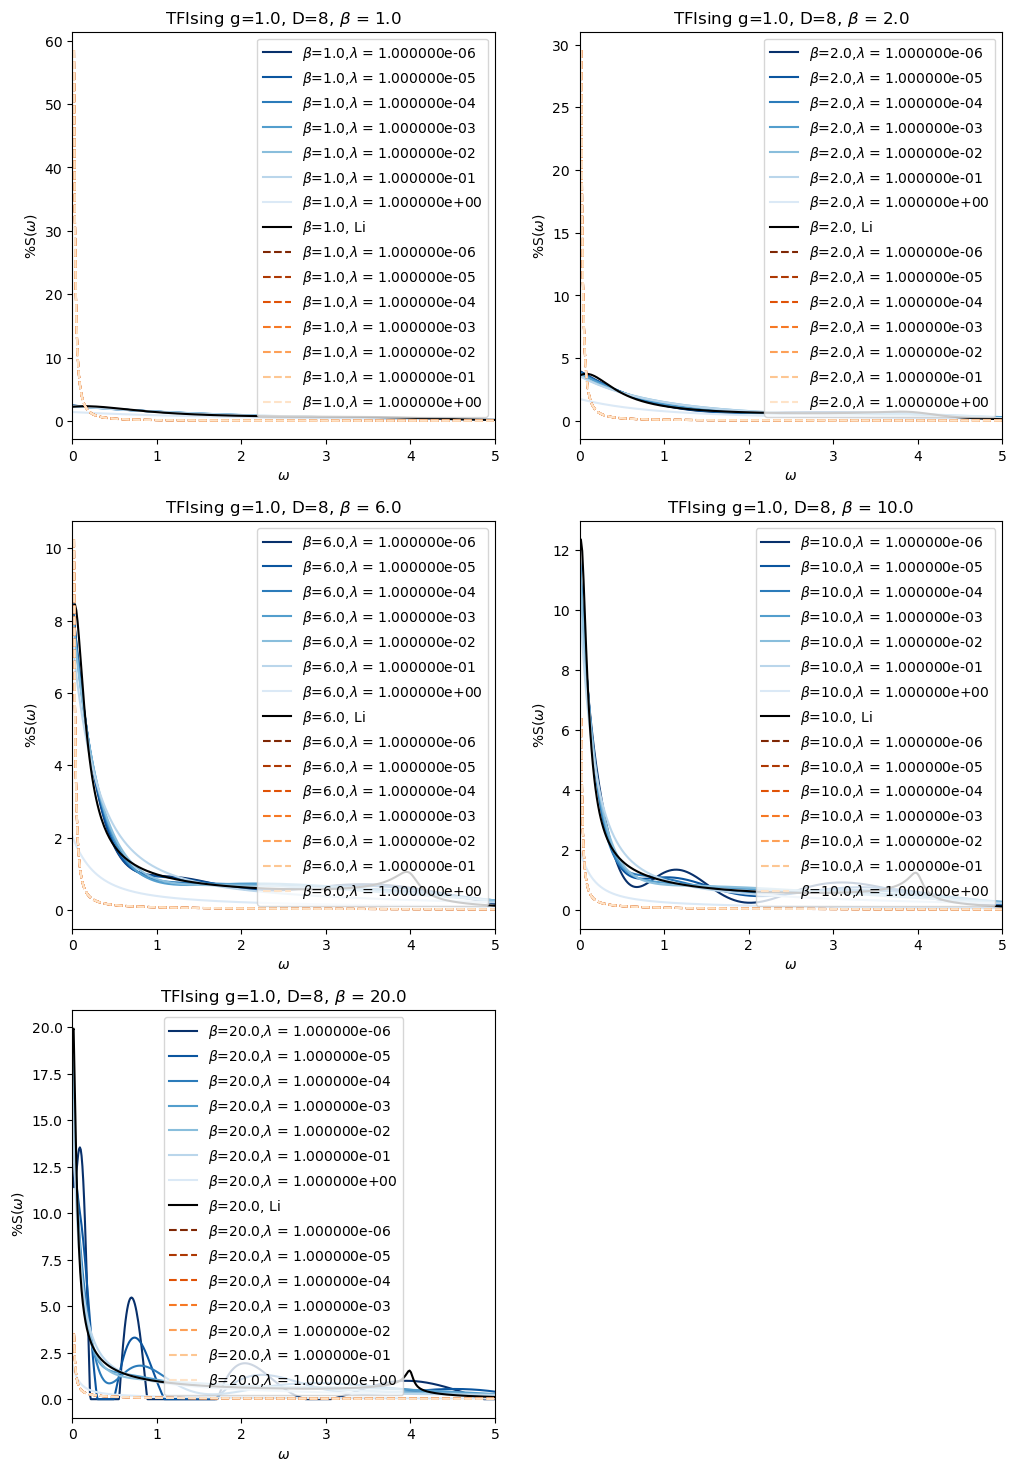

In [23]:
fh = 3; fw = 2
plt.figure(figsize=(fw*6, fh*6))
plt.subplot(fh,fw,1)
plot_Sw(1., D, laRange = lambdaRange[0::2])
#plot_Aw(1., D, laRange = lambdaRange[0::2])
plt.subplot(fh,fw,2)
plot_Sw(2., D, laRange = lambdaRange[0::2])
#plot_Aw(2., D, laRange = lambdaRange[0::2])
plt.subplot(fh,fw,3)
plot_Sw(6., D, laRange = lambdaRange[0::2])
#plot_Aw(6., D, laRange = lambdaRange[0::2])
plt.subplot(fh,fw,4)
plot_Sw(10., D, laRange = lambdaRange[0::2])
#plot_Aw(10., D, laRange = lambdaRange[0::2])
plt.subplot(fh,fw,5)
plot_Sw(20., D, laRange = lambdaRange[0::2])
#plot_Aw(20., D, laRange = lambdaRange[0::2])

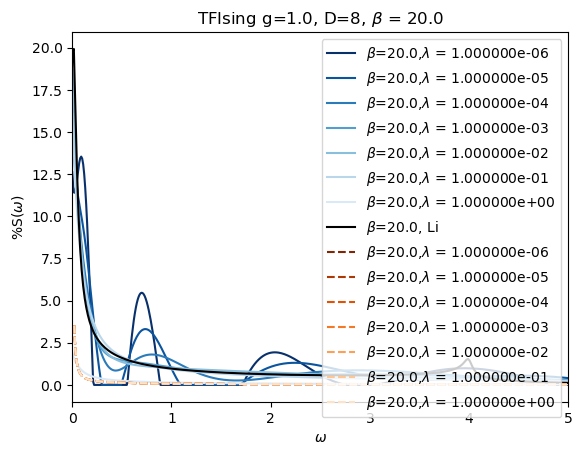

In [24]:
b  = 20
plot_Sw(b, D, laRange = lambdaRange[0::2])
plot_Aw(b, D, laRange = lambdaRange[0::2])

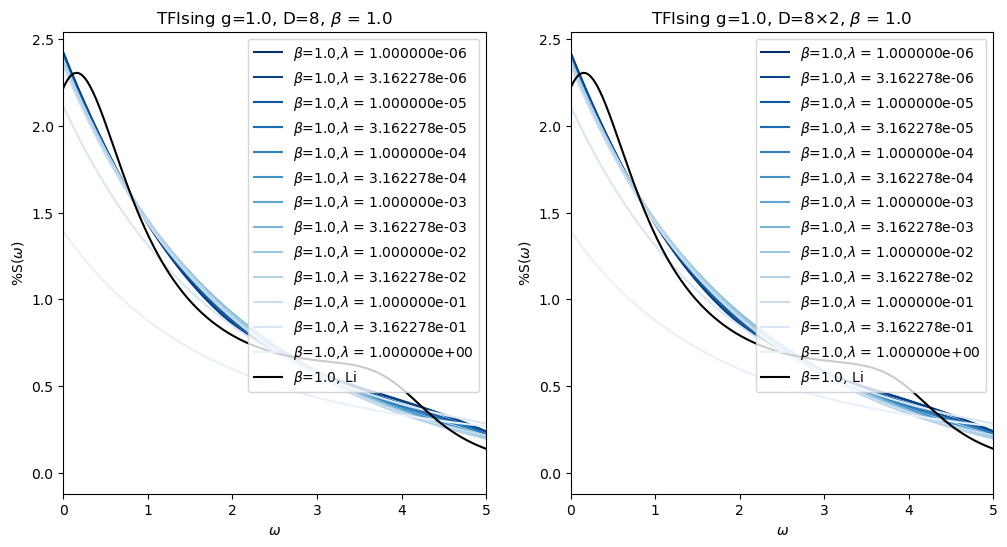

In [25]:
plt.figure(figsize=(12, 6))
b = 1.0
plt.subplot(121)
plot_Sw(b, D)
plt.subplot(122)
plot_Sw(b, D, m2 = True)